**Obesity research in specialty journals from 2000 to 2023: A bibliometric analysis**

In [ ]:
import os
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy import stats
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the CSV file in Google Drive and load
data_path = '/content/drive/My Drive/DATASETS/OBESITY.JOURNALS/'

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
# Load your dataset
file_name = os.path.join(data_path, 'merged_results_filtered.csv')
df = pd.read_csv(file_name)
df.head()

,id,funders,abstract,category_bra,category_for,category_hra,category_hrcs_hc,category_rcdc,category_sdg,category_uoa,...,pages,type,year,journal.id,journal.title,volume,issue,authors_count,concepts_scores,issn
0,pub.1000391299,NaN,IntroductionIrisin is a myokine secreted from ...,"[{'id': '4001', 'name': 'Clinical Medicine and...","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '3901', 'name': 'Clinical'}]","[{'id': '906', 'name': 'Metabolic and endocrin...","[{'id': '612', 'name': 'Physical Activity'}, {...",NaN,"[{'id': '30024', 'name': 'C24 Sport and Exerci...",...,15-20,article,2016.0,jour.1155510,Obesity Medicine,1.0,NaN,2,"[{'concept': 'sedentary young women', 'relevan...",24518476
1,pub.1007273132,"[{'acronym': 'ESE', 'city_name': 'Bristol', 'c...","Hormones encoded by the ghrelin gene, GHRL, re...","[{'id': '4000', 'name': 'Basic Science'}]","[{'id': '80051', 'name': '3208 Medical Physiol...",NaN,"[{'id': '894', 'name': 'Cardiovascular'}, {'id...","[{'id': '507', 'name': 'Clinical Research'}, {...",NaN,"[{'id': '30001', 'name': 'A01 Clinical Medicin...",...,1-3,article,2017.0,jour.1155510,Obesity Medicine,5.0,NaN,5,"[{'concept': 'ghrelin gene expression', 'relev...",24518476
2,pub.1007962492,NaN,PurposeThe aim of this study was to clarify th...,"[{'id': '4001', 'name': 'Clinical Medicine and...","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '3901', 'name': 'Clinical'}]","[{'id': '906', 'name': 'Metabolic and endocrin...","[{'id': '438', 'name': 'Diabetes'}, {'id': '38...",NaN,"[{'id': '30002', 'name': 'A02 Public Health, H...",...,1-5,article,2016.0,jour.1155510,Obesity Medicine,1.0,NaN,6,"[{'concept': 'type 2 diabetic patients', 'rele...",24518476
3,pub.1009717273,"[{'acronym': 'CNPq', 'city_name': 'Brasília', ...",AimsConsidering the protective role of adipone...,"[{'id': '4001', 'name': 'Clinical Medicine and...","[{'id': '80056', 'name': '3213 Paediatrics'}, ...",NaN,"[{'id': '906', 'name': 'Metabolic and endocrin...","[{'id': '389', 'name': 'Obesity'}, {'id': '308...",NaN,"[{'id': '30003', 'name': 'A03 Allied Health Pr...",...,4-10,article,2017.0,jour.1155510,Obesity Medicine,5.0,NaN,13,"[{'concept': 'biomarkers of inflammation', 're...",24518476
4,pub.1012242667,"[{'acronym': 'EC', 'city_name': 'Brussels', 'c...",BackgroundThe relation between area-level soci...,"[{'id': '4003', 'name': 'Public Health'}]","[{'id': '80003', 'name': '32 Biomedical and Cl...","[{'id': '3903', 'name': 'Population & Society'}]","[{'id': '906', 'name': 'Metabolic and endocrin...","[{'id': '389', 'name': 'Obesity'}, {'id': '558...",NaN,"[{'id': '30003', 'name': 'A03 Allied Health Pr...",...,13-18,article,2016.0,jour.1155510,Obesity Medicine,2.0,NaN,5,[{'concept': 'area-level socio-economic status...,24518476


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    30061 non-null  object 
 1   funders               15962 non-null  object 
 2   abstract              30061 non-null  object 
 3   category_bra          24511 non-null  object 
 4   category_for          30057 non-null  object 
 5   category_hra          23646 non-null  object 
 6   category_hrcs_hc      21569 non-null  object 
 7   category_rcdc         29610 non-null  object 
 8   category_sdg          5844 non-null   object 
 9   category_uoa          30042 non-null  object 
 10  category_hrcs_rac     14285 non-null  object 
 11  category_icrp_cso     3628 non-null   object 
 12  category_icrp_ct      5293 non-null   object 
 13  recent_citations      30061 non-null  float64
 14  reference_ids         29562 non-null  object 
 15  concepts           

In [ ]:
df['journal.title'].value_counts()

,count
journal.title,
Obesity Surgery,7585
Obesity,6854
International Journal of Obesity,6021
Obesity Reviews,2146
Pediatric Obesity,1483
Obesity Research & Clinical Practice,1075
Obesity Facts,880
Childhood Obesity,818
Journal of Obesity,772


In [ ]:
df['issn'].value_counts()

,count
issn,
9608923,7585
19307381,6854
3070565,6021
14677881,2146
20476302,1483
18780318,1075
16624025,880
21532168,818
20900708,772


**Scientific Production (2000 - 2023)** 

In [ ]:
# Set style for figures
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

def prepare_data(df):
    """
    Prepare the dataframe for analysis
    """
    # Filter data for the period 2000-2023
    df_filtered = df[(df['year'] >= 2000) & (df['year'] <= 2023)].copy()

    # Remove rows with missing year or journal information
    df_filtered = df_filtered.dropna(subset=['year', 'journal.title'])

    return df_filtered

def get_cumulative_docs_by_journal(df):
    """
    Calculate cumulative number of documents by journal over time
    """
    # Group by journal and year, count documents
    journal_year_counts = df.groupby(['journal.title', 'year']).size().reset_index(name='count')

    # Create a complete year range for each journal
    years = range(2000, 2024)
    cumulative_data = []

    for journal in journal_year_counts['journal.title'].unique():
        journal_data = journal_year_counts[journal_year_counts['journal.title'] == journal]

        # Create year-count mapping
        year_count_map = dict(zip(journal_data['year'], journal_data['count']))

        cumulative_count = 0
        for year in years:
            count = year_count_map.get(year, 0)
            cumulative_count += count

            cumulative_data.append({
                'journal': journal,
                'year': year,
                'annual_count': count,
                'cumulative_count': cumulative_count
            })

    return pd.DataFrame(cumulative_data)

def get_cumulative_docs_all_journals(df):
    """
    Calculate cumulative number of documents for all journals combined over time
    """
    # Count total documents per year
    yearly_counts = df.groupby('year').size().reset_index(name='count')

    # Ensure all years from 2000-2023 are present
    years = range(2000, 2024)
    year_count_map = dict(zip(yearly_counts['year'], yearly_counts['count']))

    cumulative_data = []
    cumulative_count = 0

    for year in years:
        count = year_count_map.get(year, 0)
        cumulative_count += count

        cumulative_data.append({
            'year': year,
            'annual_count': count,
            'cumulative_count': cumulative_count
        })

    return pd.DataFrame(cumulative_data)

def plot_yearly_production(df, figsize=(12, 8)):
    """
    Create a figure showing yearly scientific production
    """
    # Count documents per year
    yearly_counts = df['year'].value_counts().sort_index()

    fig, ax = plt.subplots(figsize=figsize)

    # Create bar plot
    bars = ax.bar(yearly_counts.index, yearly_counts.values,
                  color='steelblue', alpha=0.7, edgecolor='navy', linewidth=0.5)

    # Customize the plot
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Publications', fontsize=12, fontweight='bold')
    ax.set_title('Scientific Production by Year (2000-2023)',
                 fontsize=14, fontweight='bold', pad=20)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

    # Customize grid and spines
    ax.grid(True, alpha=0.3, axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set x-axis ticks
    ax.set_xticks(range(2000, 2024, 2))
    ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    return fig, yearly_counts

def plot_all_journals_cumulative(cumulative_df, journal_colors=None, figsize=(16, 10)):
    """
    Plot cumulative publications for all 14 journals with distinctive colors
    Legend ordered by 2023 publications (highest to lowest)
    """
    # Define 14 distinctive colors
    if journal_colors is None:
        journal_colors = [
            '#FF0000',  # Red
            '#0000FF',  # Blue
            '#00FF00',  # Green
            '#FF8000',  # Orange
            '#8000FF',  # Purple
            '#00FFFF',  # Cyan
            '#FF00FF',  # Magenta
            '#808000',  # Olive
            '#008080',  # Teal
            '#800080',  # Maroon
            '#000080',  # Navy
            '#FF69B4',  # Hot Pink
            '#32CD32',  # Lime Green
            '#FFD700'   # Gold
        ]

    # Get all journals and order by 2023 publications (highest to lowest)
    journals_2023 = cumulative_df[cumulative_df['year'] == 2023].copy()
    journals_2023 = journals_2023.sort_values('cumulative_count', ascending=False)
    ordered_journals = journals_2023['journal'].tolist()

    n_journals = len(ordered_journals)
    print(f"Plotting {n_journals} journals (ordered by 2023 publications)")

    # Ensure we have enough colors
    if len(journal_colors) < n_journals:
        # Extend colors if needed by cycling through the list
        journal_colors = (journal_colors * ((n_journals // len(journal_colors)) + 1))[:n_journals]

    fig, ax = plt.subplots(figsize=figsize)

    # Plot lines for each journal with distinctive colors (in order of 2023 publications)
    for i, journal in enumerate(ordered_journals):
        journal_data = cumulative_df[cumulative_df['journal'] == journal]
        ax.plot(journal_data['year'], journal_data['cumulative_count'],
                marker='o', linewidth=2.5, markersize=4,
                label=journal, alpha=0.8, color=journal_colors[i])

    # Customize the plot
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax.set_ylabel('Cumulative Number of Publications', fontsize=12, fontweight='bold')
    ax.set_title(f'Cumulative Publications by Journal (All {n_journals} Journals)',
                 fontsize=14, fontweight='bold', pad=20)

    # Legend handles and labels
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

    # Customize grid and spines
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set x-axis ticks
    ax.set_xticks(range(2000, 2024, 2))
    ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    return fig, ordered_journals

def plot_cumulative_all_journals_combined(cumulative_all_df, figsize=(12, 8)):
    """
    Plot cumulative publications for all journals combined
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Plot the cumulative line for all journals combined
    ax.plot(cumulative_all_df['year'], cumulative_all_df['cumulative_count'],
            marker='o', linewidth=3, markersize=6,
            color='steelblue', alpha=0.8, label='All Journals Combined')

    # Fill area under the curve for visual appeal
    ax.fill_between(cumulative_all_df['year'], cumulative_all_df['cumulative_count'],
                    alpha=0.3, color='steelblue')

    # Customize the plot
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax.set_ylabel('Cumulative Number of Publications', fontsize=12, fontweight='bold')
    ax.set_title('Cumulative Publications - All Journals Combined (2000-2023)',
                 fontsize=14, fontweight='bold', pad=20)

    # Add value labels at key points (every 4 years)
    for i, row in cumulative_all_df.iterrows():
        if row['year'] % 4 == 0 or row['year'] == 2023:  # Show every 4 years + final year
            ax.annotate(f"{int(row['cumulative_count'])}",
                       (row['year'], row['cumulative_count']),
                       textcoords="offset points", xytext=(0,10), ha='center',
                       fontsize=9, fontweight='bold')

    # Customize grid and spines
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set x-axis ticks
    ax.set_xticks(range(2000, 2024, 2))
    ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    return fig

def create_journal_summary_table(cumulative_df):
    """
    Create a summary table of journal statistics
    """
    summary = cumulative_df.groupby('journal').agg({
        'cumulative_count': 'max',
        'annual_count': ['sum', 'mean', 'std']
    }).round(2)

    # Flatten column names
    summary.columns = ['Total_Publications', 'Total_Check', 'Mean_Annual', 'Std_Annual']
    summary = summary.drop('Total_Check', axis=1)
    summary = summary.sort_values('Total_Publications', ascending=False)

    return summary

# Main analysis workflow
def run_bibliometric_analysis(df, journal_colors=None):
    """
    Run the complete bibliometric analysis
    """
    print("Starting bibliometric analysis...")

    # Prepare data
    df_clean = prepare_data(df)
    print(f"Data prepared: {len(df_clean)} documents from {df_clean['year'].min()} to {df_clean['year'].max()}")
    print(f"Number of unique journals: {df_clean['journal.title'].nunique()}")

    # Calculate cumulative data by journal
    cumulative_df = get_cumulative_docs_by_journal(df_clean)
    print("Cumulative data by journal calculated")

    # Calculate cumulative data for all journals combined
    cumulative_all_df = get_cumulative_docs_all_journals(df_clean)
    print("Cumulative data for all journals combined calculated")

    # Create visualizations
    print("Creating visualizations...")

    # 1. Yearly production plot
    fig1, yearly_stats = plot_yearly_production(df_clean)
    plt.show()

    # 2. All journals cumulative plot (14 journals with distinctive colors)
    fig2, all_journals = plot_all_journals_cumulative(cumulative_df, journal_colors)
    plt.show()

    # 3. All journals combined cumulative plot
    fig3 = plot_cumulative_all_journals_combined(cumulative_all_df)
    plt.show()

    # 4. Create summary table
    summary_table = create_journal_summary_table(cumulative_df)

    # Get journal totals for summary
    journal_totals = cumulative_df.groupby('journal')['cumulative_count'].max().sort_values(ascending=False)

    print("\nAnalysis Summary:")
    print(f"Total publications (2000-2023): {len(df_clean)}")
    print(f"Peak year: {yearly_stats.idxmax()} ({yearly_stats.max()} publications)")
    print(f"Average publications per year: {yearly_stats.mean():.1f}")
    print(f"Final cumulative count (2023): {cumulative_all_df.iloc[-1]['cumulative_count']}")

    print(f"\nAll {len(all_journals)} journals by total publications:")
    print(journal_totals.to_string())

    return {
        'clean_data': df_clean,
        'cumulative_data': cumulative_df,
        'cumulative_all_data': cumulative_all_df,
        'yearly_stats': yearly_stats,
        'journal_totals': journal_totals,
        'summary_table': summary_table,
        'figures': [fig1, fig2, fig3],
        'all_journals': all_journals
    }


# To save figures
def save_figures_for_publication(figures, data_path, dpi=600, format='tiff'):
    """
    Save all three figures in publication quality TIFF format to specified path
    """
    figure_names = ['yearly_production', 'all_journals_cumulative', 'all_journals_combined_cumulative']

    for i, fig in enumerate(figures):
        filename = os.path.join(data_path, f'{figure_names[i]}.{format}')
        fig.savefig(filename, dpi=dpi, bbox_inches='tight',
                   facecolor='white', edgecolor='none',
                   format=format, pil_kwargs={'compression': 'tiff_lzw'})
        print(f"Saved: {filename}")

Starting bibliometric analysis...
Data prepared: 30061 documents from 2000.0 to 2023.0
Number of unique journals: 15
Cumulative data by journal calculated
Cumulative data for all journals combined calculated
Creating visualizations...


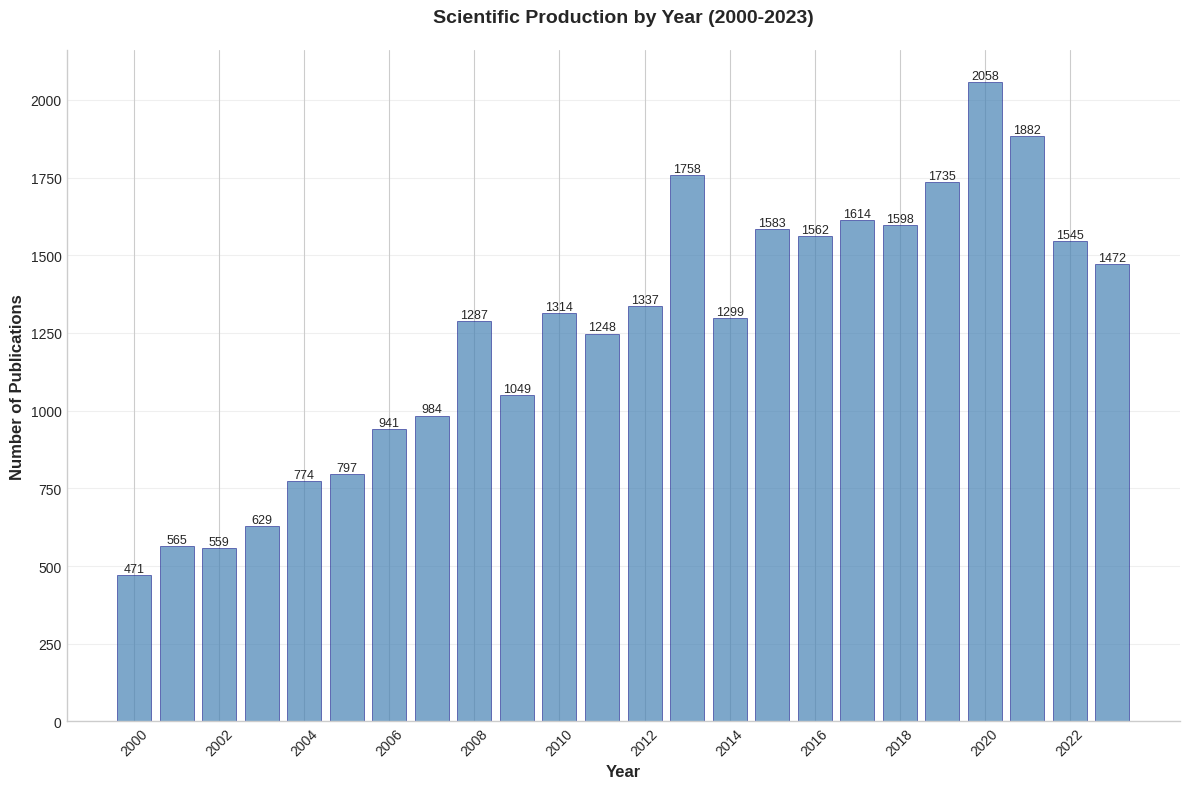

Plotting 15 journals (ordered by 2023 publications)


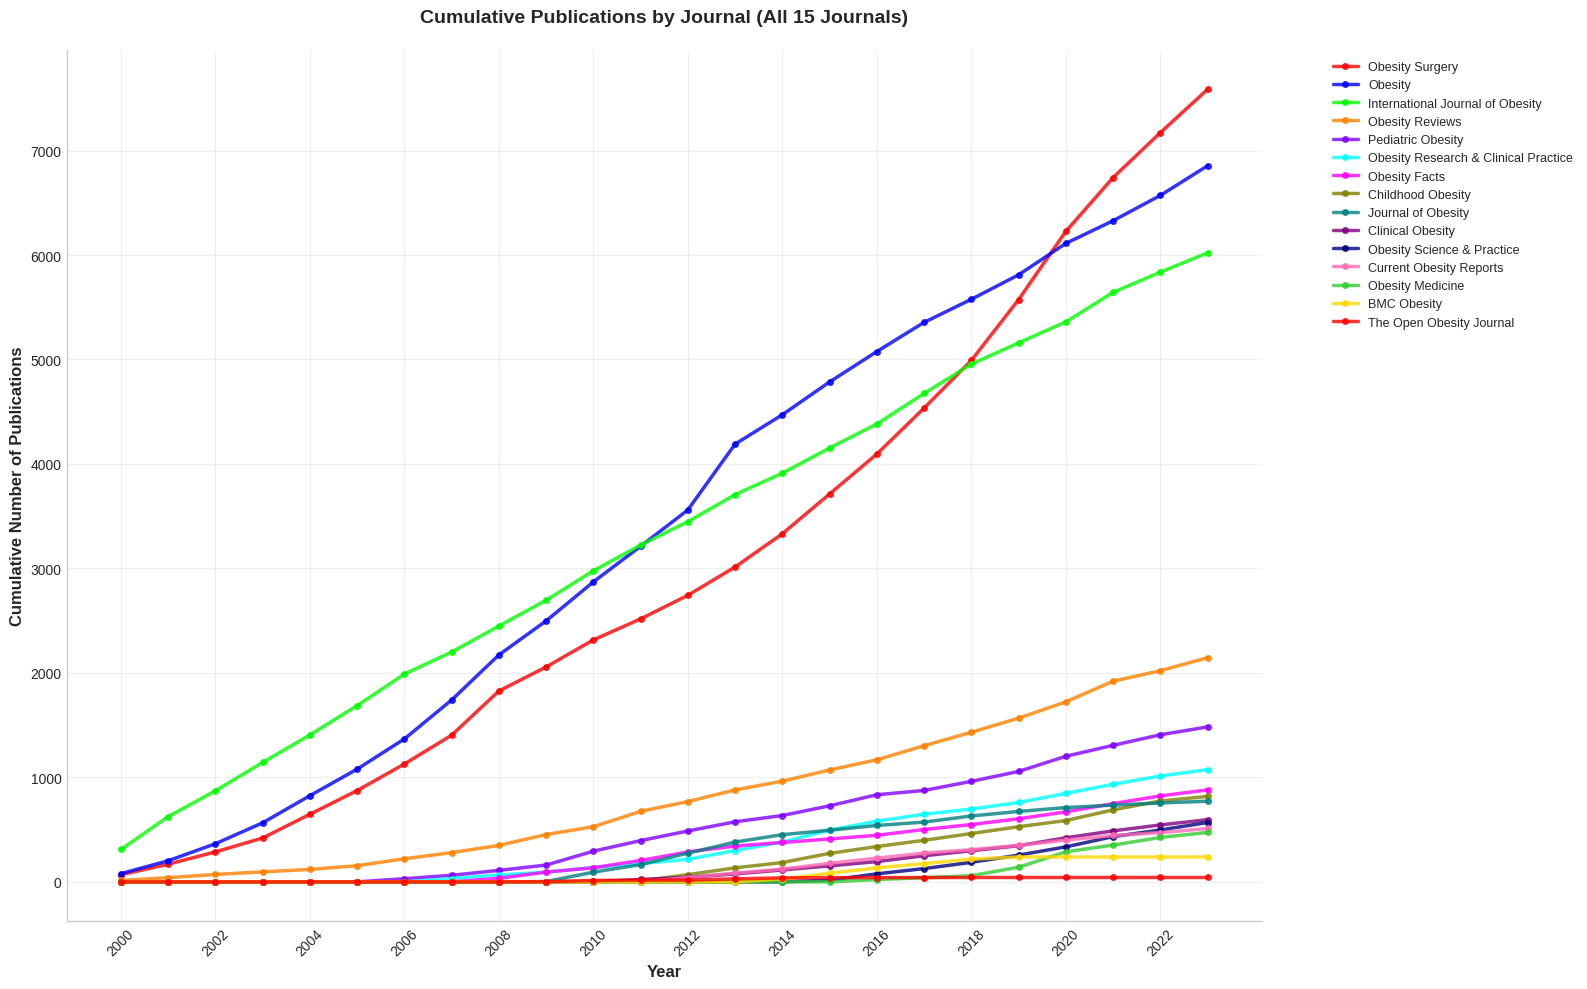

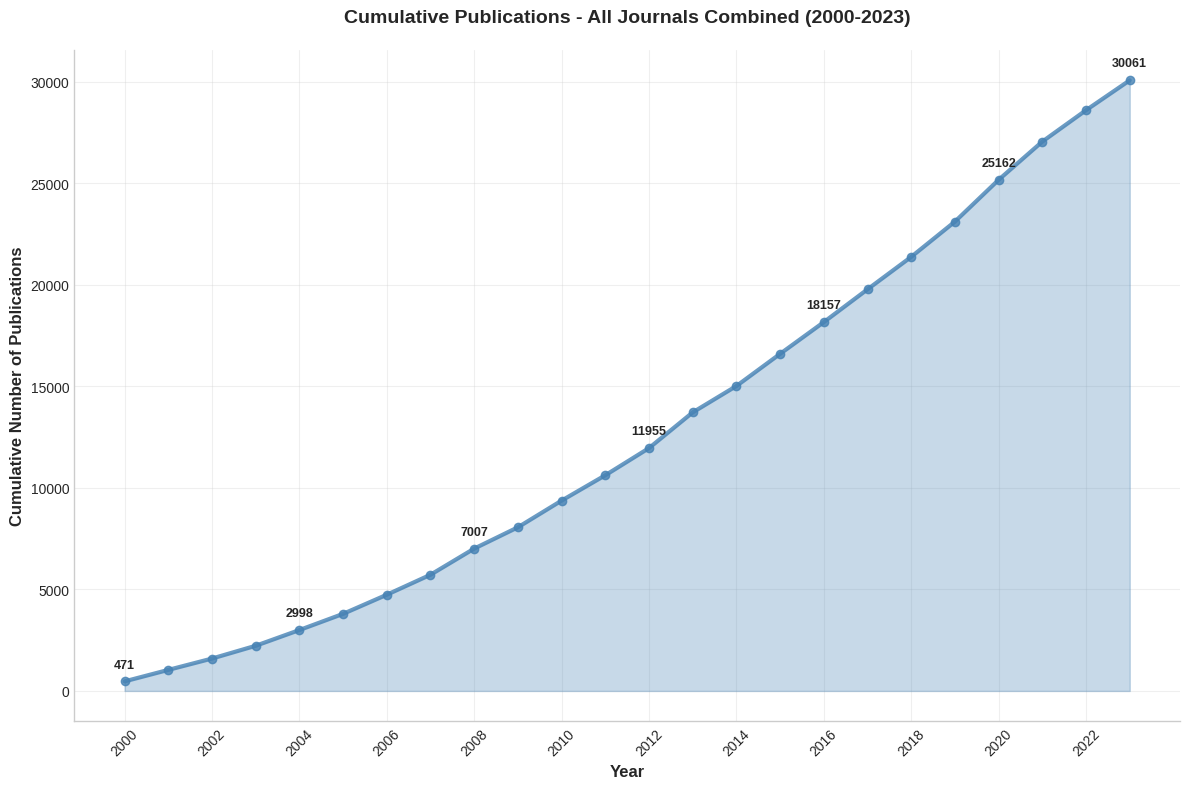


Analysis Summary:
Total publications (2000-2023): 30061
Peak year: 2020.0 (2058 publications)
Average publications per year: 1252.5
Final cumulative count (2023): 30061

All 15 journals by total publications:
journal
Obesity Surgery                         7585
Obesity                                 6854
International Journal of Obesity        6021
Obesity Reviews                         2146
Pediatric Obesity                       1483
Obesity Research & Clinical Practice    1075
Obesity Facts                            880
Childhood Obesity                        818
Journal of Obesity                       772
Clinical Obesity                         595
Obesity Science & Practice               568
Current Obesity Reports                  511
Obesity Medicine                         473
BMC Obesity                              238
The Open Obesity Journal                  42
Saved: /content/drive/My Drive/DATASETS/OBESITY.JOURNALS/yearly_production.tiff
Saved: /content/drive/My Dr

In [ ]:
results = run_bibliometric_analysis(df, JOURNAL_COLORS)
save_figures_for_publication(results['figures'], data_path)

In [ ]:
# Create a visualization of scientific production over time with linear and exponential trend lines.

# Set the style and color palette
plt.style.use('default')
sns.set_palette("husl")

def create_bibliographic_visualization(df,
                                     figure_size=(12, 8),
                                     line_color='#1877F2',  # Facebook blue
                                     line_width=2.5,
                                     trend_line_width=1.5,
                                     font_size=12,
                                     title_font_size=16,
                                     dpi=300,
                                     export_format='tiff',
                                     filename='scientific_production_trends'):
    
    # Filter data for the period 2000-2023
    df_filtered = df[(df['year'] >= 2000) & (df['year'] <= 2023)].copy()

    # Count publications per year
    yearly_counts = df_filtered['year'].value_counts().sort_index()

    # Prepare data for trend line fitting
    years = yearly_counts.index.values
    counts = yearly_counts.values

    # Linear regression
    slope_linear, intercept_linear, r_linear, p_linear, std_err_linear = stats.linregress(years, counts)
    linear_trend = slope_linear * years + intercept_linear
    r2_linear = r_linear**2

    # Exponential regression using log transformation method
    try:
        # Filter out zero or negative values for log transformation
        mask = counts > 0
        valid_years = years[mask]
        valid_counts = counts[mask]

        if len(valid_counts) > 3:
            # Log-linear regression: ln(y) = a*x + b  =>  y = exp(a*x + b)
            log_counts = np.log(valid_counts)
            exp_slope, exp_intercept, _, _, _ = stats.linregress(valid_years, log_counts)

            # Generate exponential trend for all years
            exponential_trend = np.exp(exp_slope * years + exp_intercept)
            r2_exponential = r2_score(counts, exponential_trend)
        else:
            raise ValueError("Not enough valid data points")

    except Exception as e:
        print(f"Primary exponential fitting failed: {e}")
        try:
            # Alternative method using curve_fit with better initial parameters
            def exp_func(x, a, b):
                return a * np.exp(b * x)

            # Use only positive counts for fitting
            mask = counts > 0
            if np.sum(mask) > 3:
                popt, _ = curve_fit(exp_func, years[mask] - years[0], counts[mask],
                                  p0=[counts[mask][0], 0.05],
                                  bounds=([0, -1], [np.inf, 1]),
                                  maxfev=5000)
                exponential_trend = exp_func(years - years[0], *popt)
                r2_exponential = r2_score(counts, exponential_trend)
            else:
                # Simple exponential based on start and end points
                growth_rate = (counts[-1] / max(counts[0], 1)) ** (1 / (years[-1] - years[0]))
                exponential_trend = counts[0] * (growth_rate ** (years - years[0]))
                r2_exponential = r2_score(counts, exponential_trend)

        except Exception as e2:
            print(f"Alternative exponential fitting also failed: {e2}")
            # Final fallback - simple exponential approximation
            if counts[0] > 0 and counts[-1] > 0:
                growth_rate = np.log(counts[-1] / counts[0]) / (years[-1] - years[0])
                exponential_trend = counts[0] * np.exp(growth_rate * (years - years[0]))
            else:
                # Use median values if start/end are problematic
                mid_idx = len(counts) // 2
                growth_rate = 0.05  # Default 5% growth
                exponential_trend = counts[mid_idx] * np.exp(growth_rate * (years - years[mid_idx]))

            r2_exponential = r2_score(counts, exponential_trend)

    # Create the plot
    fig, ax = plt.subplots(figsize=figure_size, dpi=100)

    # Plot main data line
    ax.plot(years, counts, color=line_color, linewidth=line_width, marker='o',
            markersize=4, markerfacecolor=line_color, markeredgecolor='white',
            markeredgewidth=0.5, zorder=3)

    # Plot trend lines
    ax.plot(years, linear_trend, '--', color='gray', linewidth=trend_line_width,
            alpha=0.8, zorder=2, label=f'Linear (R² = {r2_linear:.3f})')
    ax.plot(years, exponential_trend, ':', color='darkgray', linewidth=trend_line_width,
            alpha=0.8, zorder=2, label=f'Exponential (R² = {r2_exponential:.3f})')

    # Add R² annotations with proper positioning
    # Linear trend annotation
    ax.annotate(f'R² = {r2_linear:.3f}***',
                xy=(years[-1], linear_trend[-1]),
                xytext=(10, 10), textcoords='offset points',
                fontsize=font_size-1, ha='left', va='bottom',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

    # Exponential trend annotation
    ax.annotate(f'R² = {r2_exponential:.3f}***',
                xy=(years[-1], exponential_trend[-1]),
                xytext=(10, -5), textcoords='offset points',
                fontsize=font_size-1, ha='left', va='top',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

    # Debug print to verify values are different
    print(f"Debug - Linear R²: {r2_linear:.4f}, Exponential R²: {r2_exponential:.4f}")
    print(f"Debug - Linear trend end value: {linear_trend[-1]:.1f}")
    print(f"Debug - Exponential trend end value: {exponential_trend[-1]:.1f}")
    print(f"Debug - Are trends different? {not np.allclose(linear_trend, exponential_trend)}")

    # Verify we have different trends before plotting
    if np.allclose(linear_trend, exponential_trend):
        print("WARNING: Linear and exponential trends are too similar. Recalculating exponential...")
        # Force a different exponential calculation
        growth_rate = np.log(max(counts[-1], 1) / max(counts[0], 1)) / (years[-1] - years[0])
        exponential_trend = counts[0] * np.exp(growth_rate * (years - years[0]))
        r2_exponential = r2_score(counts, exponential_trend)
        print(f"Recalculated - Exponential R²: {r2_exponential:.4f}, End value: {exponential_trend[-1]:.1f}")

    # Customize the plot
    ax.set_xlabel('Year', fontsize=font_size, fontweight='bold')
    ax.set_ylabel('Number of Publications', fontsize=font_size, fontweight='bold')
    ax.set_title('Scientific Production Over Time', fontsize=title_font_size, fontweight='bold', pad=20)

    # Set axis limits and ticks
    ax.set_xlim(2000, 2024)
    ax.set_ylim(0, max(counts) * 1.1)
    ax.set_xticks(range(2000, 2024, 2))
    ax.tick_params(axis='both', which='major', labelsize=font_size-1)

    # Add grid
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Adjust layout
    plt.tight_layout()

    # Display the plot
    plt.show()

    # Export the figure
    export_filename = os.path.join(data_path, f"{filename}.{export_format}")
    fig.savefig(export_filename, format=export_format, dpi=dpi,
                bbox_inches='tight', facecolor='white', edgecolor='none')
    print(f"Figure exported as: {export_filename}")

    # Calculate additional statistics
    avg_publications_per_year = counts.sum() / len(counts)

    # Calculate average growth rate (percentage)
    # Using compound annual growth rate (CAGR) formula
    start_value = max(counts[0], 1)  # Avoid division by zero
    end_value = counts[-1]
    years_span = len(counts) - 1
    avg_growth_rate_pct = ((end_value / start_value) ** (1 / years_span) - 1) * 100

    # Print statistics
    print(f"\n--- Trend Analysis Results ---")
    print(f"Linear Trend R²: {r2_linear:.4f}")
    print(f"Exponential Trend R²: {r2_exponential:.4f}")
    print(f"Total publications (2000-2023): {counts.sum()}")
    print(f"Average publications per year: {avg_publications_per_year:.1f}")
    print(f"Average annual growth: {slope_linear:.1f} publications/year")
    print(f"Average growth rate: {avg_growth_rate_pct:.2f}% per year")

    return fig, ax, yearly_counts

Debug - Linear R²: 0.8390, Exponential R²: 0.7114
Debug - Linear trend end value: 1928.6
Debug - Exponential trend end value: 2169.9
Debug - Are trends different? True


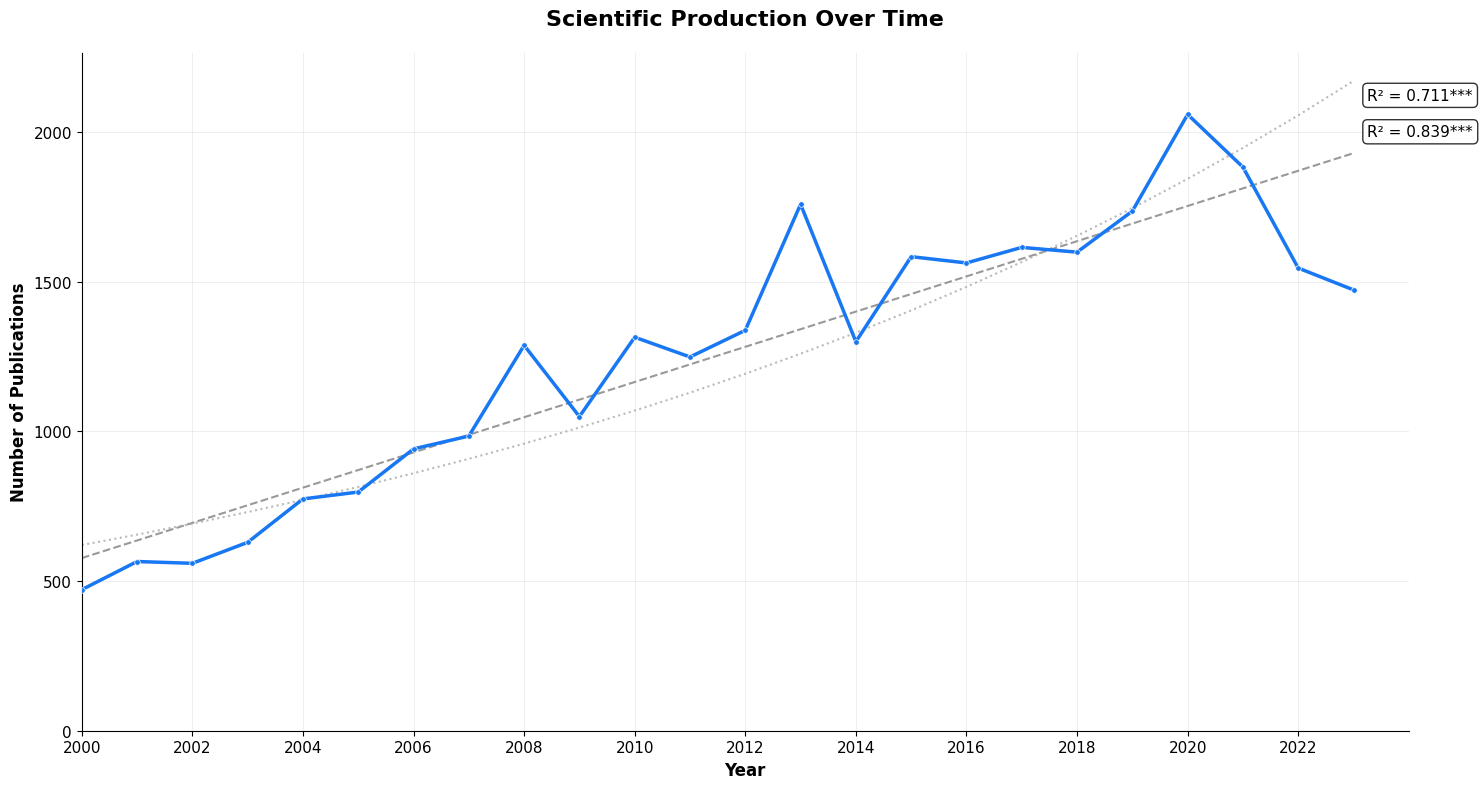

Figure exported as: /content/drive/My Drive/DATASETS/OBESITY.JOURNALS/scientific_production_trends.tiff

--- Trend Analysis Results ---
Linear Trend R²: 0.8390
Exponential Trend R²: 0.7114
Total publications (2000-2023): 30061
Average publications per year: 1252.5
Average annual growth: 58.8 publications/year
Average growth rate: 5.08% per year


In [ ]:
# Create visualization
fig, ax, yearly_data = create_bibliographic_visualization(
    df,
    figure_size=(15, 8),
    line_color='#1877F2',
    dpi=300,
    export_format='tiff',
    filename='scientific_production_trends'
)

In [ ]:
# Defining the periods
periods = {
    '2000-2007': (2000, 2007),
    '2008-2015': (2008, 2015),
    '2016-2023': (2016, 2023),
    '2000-2023': (2000, 2023)
}

### Average citations per doc.

In [ ]:
results = {}

# Compute statistics for recent_citations
for label, (start, end) in periods.items():
    mask = (df['year'] >= start) & (df['year'] <= end)
    values = df.loc[mask, 'recent_citations']

    avg_excl_nan = values.mean(skipna=True)
    std_dev = values.std(skipna=True)
    value_range = values.max(skipna=True) - values.min(skipna=True)

    avg_incl_nan = values.mean(skipna=False)

    results[label] = {
        'avg_excluding_NaN': avg_excl_nan,
        'std_dev': std_dev,
        'range': value_range,
        'avg_including_NaN': avg_incl_nan
    }

# Print results for recent_citations
print("Statistics for 'recent_citations':")
for period, stats in results.items():
    print(f"{period}:")
    print(f"  Average excluding NaNs: {round(stats['avg_excluding_NaN'], 2)}")
    print(f"  Standard deviation: {round(stats['std_dev'], 2)}")
    print(f"  Range (max - min): {round(stats['range'], 2)}")
    print(f"  Average including NaNs: {round(stats['avg_including_NaN'], 2)}")

Statistics for 'recent_citations':
2000-2007:
  Average excluding NaNs: 5.94
  Standard deviation: 13.44
  Range (max - min): 415.0
  Average including NaNs: 5.94
2008-2015:
  Average excluding NaNs: 9.03
  Standard deviation: 21.24
  Range (max - min): 676.0
  Average including NaNs: 9.03
2016-2023:
  Average excluding NaNs: 10.97
  Standard deviation: 19.83
  Range (max - min): 497.0
  Average including NaNs: 10.97
2000-2023:
  Average excluding NaNs: 9.31
  Standard deviation: 19.42
  Range (max - min): 676.0
  Average including NaNs: 9.31


### Single-authored articles

In [ ]:
for label, (start, end) in periods.items():
    count = df[
        (df['authors_count'] == 1) &
        (df['year'] >= start) &
        (df['year'] <= end)
    ].shape[0]
    print(f"{label}: {count}")

2000-2007: 329
2008-2015: 319
2016-2023: 170
2000-2023: 818


### Total documents

In [ ]:
for label, (start, end) in periods.items():
    mask = (df['year'] >= start) & (df['year'] <= end)
    values = df.loc[mask, 'recent_citations']

    # Total number of documents in the period
    total_documents = mask.sum()  # or len(df.loc[mask])

    avg_excl_nan = values.mean(skipna=True)   # Exclude NaNs
    avg_incl_nan = values.mean(skipna=False)  # Include NaNs (will be NaN if any NaN present)

    results[label] = {
        'total_documents': total_documents,
        'avg_excluding_NaN': avg_excl_nan,
        'avg_including_NaN': avg_incl_nan
    }

# Display results
for period, stats in results.items():
    print(f"{period}: {stats['total_documents']} documents")

2000-2007: 5720 documents
2008-2015: 10875 documents
2016-2023: 13466 documents
2000-2023: 30061 documents


### Average co-authors per article

In [ ]:
print("\nStatistics for 'authors_count':")
for label, (start, end) in periods.items():
    mask = (df['year'] >= start) & (df['year'] <= end)
    values = df.loc[mask, 'authors_count']
    avg = values.mean(skipna=True)
    std = values.std(skipna=True)
    rng = values.max(skipna=True) - values.min(skipna=True)

    print(f"{label}:")
    print(f"  Average: {avg:.2f}")
    print(f"  Standard deviation: {std:.2f}")
    print(f"  Range (max - min): {rng}")


Statistics for 'authors_count':
2000-2007:
  Average: 5.15
  Standard deviation: 2.82
  Range (max - min): 41
2008-2015:
  Average: 6.10
  Standard deviation: 3.53
  Range (max - min): 60
2016-2023:
  Average: 7.11
  Standard deviation: 7.03
  Range (max - min): 433
2000-2023:
  Average: 6.37
  Standard deviation: 5.36
  Range (max - min): 433


### International co-authorships

In [ ]:
import ast

def count_unique_countries(authors):
    # Convert string to list if needed
    if isinstance(authors, str):
        try:
            authors = ast.literal_eval(authors)
        except Exception:
            return 0
    if not isinstance(authors, list):
        return 0
    countries = set()
    for author in authors:
        if isinstance(author, dict) and 'affiliations' in author:
            for aff in author['affiliations']:
                if isinstance(aff, dict) and aff.get('country'):
                    countries.add(aff['country'])
    return len(countries)

for label, (start, end) in periods.items():
    mask = (
        (df['year'] >= start) &
        (df['year'] <= end) &
        (df['authors'].apply(count_unique_countries) >= 2)
    )
    count = df[mask].shape[0]
    print(f"{label}: {count}")

2000-2007: 872
2008-2015: 2237
2016-2023: 3476
2000-2023: 6585
